In [13]:
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import nltk
from nltk.corpus import stopwords

# Завантаження стоп-слів
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yevheniia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# Функція для очищення тексту
def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text) # видалення HTML-тегів
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\s+', ' ', text).strip() # зайві пробіли
    # Видалення стоп-слів
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

In [15]:
# Завантаження датасету
df = pd.read_csv('Resume.csv', encoding='utf-8')
df['Resume_str'] = df['Resume_str'].fillna('')
df['cleaned_resume'] = df['Resume_str'].apply(clean_text)
df

,ID,Resume_str,Resume_html,Category,cleaned_resume
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr administratormarketing associate hr adminis...
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,hr specialist us hr operations summary versati...
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr director summary 20 years experience recrui...
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr specialist summary dedicated driven dynamic...
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr manager skill highlights hr skills hr depar...
...,...,...,...,...,...
2479,99416532,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,rank sgte5 non commissioned officer charge bri...
2480,24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS ...","<div class=""fontsize fontface vmargins hmargin...",AVIATION,government relations communications organizati...
2481,31605080,GEEK SQUAD AGENT Professional...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,geek squad agent professional profile support ...
2482,21190805,PROGRAM DIRECTOR / OFFICE MANAGER ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,program director office manager summary highly...


In [16]:
print(df['Category'].unique())
df['Category'] = df['Category'].str.strip()

['HR' 'DESIGNER' 'INFORMATION-TECHNOLOGY' 'TEACHER' 'ADVOCATE'
 'BUSINESS-DEVELOPMENT' 'HEALTHCARE' 'FITNESS' 'AGRICULTURE' 'BPO' 'SALES'
 'CONSULTANT' 'DIGITAL-MEDIA' 'AUTOMOBILE' 'CHEF' 'FINANCE' 'APPAREL'
 'ENGINEERING' 'ACCOUNTANT' 'CONSTRUCTION' 'PUBLIC-RELATIONS' 'BANKING'
 'ARTS' 'AVIATION']


In [17]:
def plot_wordcloud(category_name):
    # Фільтруємо дані
    category_data = df[df['Category'] == category_name]['cleaned_resume']

    if category_data.empty or "".join(category_data).strip() == "":
        print(f"Попередження: Немає даних для категорії '{category_name}'")
        return

    text = " ".join(category_data)
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Найпоширеніші слова для: {category_name}")
    plt.axis('off')
    plt.show()

In [18]:
tfidf = TfidfVectorizer(max_features=3000) # беремо 3000 найважливіших слів
X = tfidf.fit_transform(df['cleaned_resume'])
y = df['Category']

# Розділення на тренувальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Навчання моделі
model = MultinomialNB()
model.fit(X_train, y_train)

# Передбачення
y_pred = model.predict(X_test)

# Оцінка
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.5654

Classification Report:
                        precision    recall  f1-score   support

            ACCOUNTANT       0.77      0.93      0.84        29
              ADVOCATE       0.56      0.50      0.53        30
           AGRICULTURE       1.00      0.12      0.22         8
               APPAREL       0.75      0.30      0.43        20
                  ARTS       0.00      0.00      0.00        18
            AUTOMOBILE       0.00      0.00      0.00         6
              AVIATION       0.62      0.76      0.68        21
               BANKING       0.70      0.61      0.65        23
                   BPO       0.00      0.00      0.00         2
  BUSINESS-DEVELOPMENT       0.55      0.63      0.59        27
                  CHEF       0.81      0.71      0.76        24
          CONSTRUCTION       0.88      0.65      0.75        34
            CONSULTANT       1.00      0.05      0.10        20
              DESIGNER       0.78      0.74      0.76        1

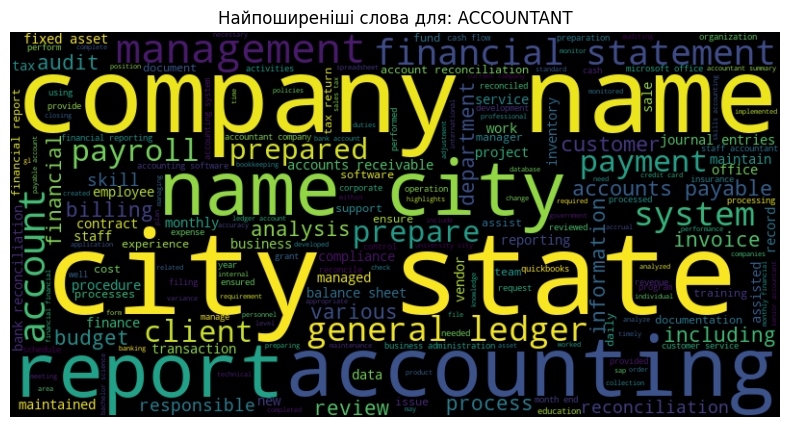

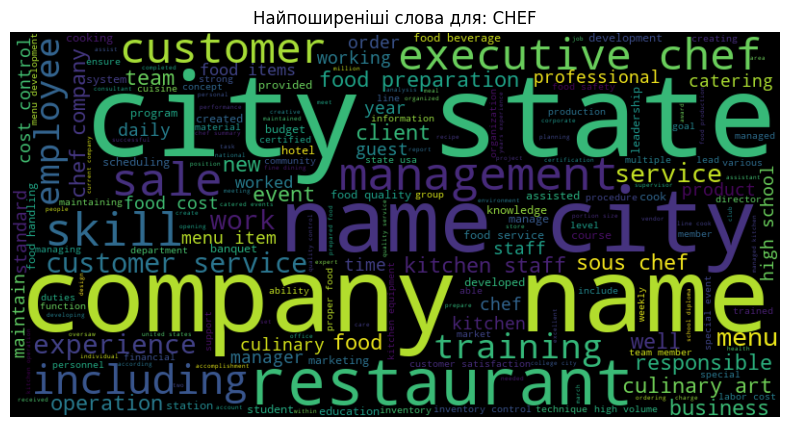

In [20]:
plot_wordcloud('ACCOUNTANT')
plot_wordcloud('CHEF')